# IML ASSIGNMENT 3 - (LAB 2)

#### QUESTION 1        ( DATA PREPROCESSING )

##### Load the dataset and drop the missing values

In [92]:
import pandas as pd 
dataset = pd.read_csv('heart_disease_uci.csv')
df = dataset.dropna()
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


#### Normalize the dataset so that all features are on the same scale.

In [93]:
numeric_columns = [ 'age','trestbps','chol','thalch','oldpeak']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head(10)

C:\Users\Pushkin\AppData\Local\Temp\ipykernel_19048\4097181731.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,0.940446,Male,Cleveland,typical angina,0.749760,-0.262867,True,lv hypertrophy,0.029124,False,1.069475,downsloping,0.0,fixed defect,0
1,2,1.384143,Male,Cleveland,asymptomatic,1.596354,0.747722,False,lv hypertrophy,-1.790447,True,0.380309,flat,3.0,normal,2
2,3,1.384143,Male,Cleveland,asymptomatic,-0.661231,-0.339138,False,lv hypertrophy,-0.880662,True,1.327912,flat,2.0,reversable defect,1
3,4,-1.943588,Male,Cleveland,non-anginal,-0.096835,0.061285,False,normal,1.632079,False,2.103224,downsloping,0.0,normal,0
4,5,-1.499891,Female,Cleveland,atypical angina,-0.096835,-0.815830,False,lv hypertrophy,0.982232,False,0.294163,upsloping,0.0,normal,0
5,6,0.163975,Male,Cleveland,atypical angina,-0.661231,-0.205664,False,normal,1.242171,False,-0.222711,upsloping,0.0,normal,0
6,7,0.829521,Female,Cleveland,asymptomatic,0.467562,0.404503,False,lv hypertrophy,0.462355,False,2.189370,downsloping,2.0,normal,3
7,8,0.274900,Female,Cleveland,asymptomatic,-0.661231,2.044327,False,normal,0.592324,True,-0.395003,upsloping,0.0,normal,0
8,9,0.940446,Male,Cleveland,asymptomatic,-0.096835,0.137555,False,lv hypertrophy,-0.100846,False,0.294163,flat,1.0,reversable defect,2
9,10,-0.168798,Male,Cleveland,asymptomatic,0.467562,-0.834898,True,lv hypertrophy,0.245739,True,1.758641,downsloping,0.0,reversable defect,1


#### Encode categorical variables

In [94]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'].astype(str))
categorical_columns = ['dataset','cp','restecg','slope','thal']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(df[categorical_columns])
encoded_columns = encoder.get_feature_names_out(input_features=categorical_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
df = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)
df.head(10)

C:\Users\Pushkin\AppData\Local\Temp\ipykernel_19048\3998577923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = label_encoder.fit_transform(df['sex'].astype(str))
C:\Users\Pushkin\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Pushkin\AppData\Local\Temp\ipykernel_19048\3998577923.py:9: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df.drop(categorical_columns, axis=1), encod

,id,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,...,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.0,0.940446,1.0,0.749760,-0.262867,True,0.029124,False,1.069475,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.384143,1.0,1.596354,0.747722,False,-1.790447,True,0.380309,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3.0,1.384143,1.0,-0.661231,-0.339138,False,-0.880662,True,1.327912,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4.0,-1.943588,1.0,-0.096835,0.061285,False,1.632079,False,2.103224,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5.0,-1.499891,0.0,-0.096835,-0.815830,False,0.982232,False,0.294163,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,6.0,0.163975,1.0,-0.661231,-0.205664,False,1.242171,False,-0.222711,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
6,7.0,0.829521,0.0,0.467562,0.404503,False,0.462355,False,2.189370,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,8.0,0.274900,0.0,-0.661231,2.044327,False,0.592324,True,-0.395003,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
8,9.0,0.940446,1.0,-0.096835,0.137555,False,-0.100846,False,0.294163,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,10.0,-0.168798,1.0,0.467562,-0.834898,True,0.245739,True,1.758641,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
boolean_columns = df.select_dtypes(include=[bool]).columns
df[boolean_columns] = df[boolean_columns].astype(int)
df.head(10)

,id,age,sex,trestbps,chol,thalch,oldpeak,ca,num,dataset_Hungary,...,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,fbs_True,exang_False,exang_True
0,1.0,0.940446,1.0,0.749760,-0.262867,0.029124,1.069475,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0
1,2.0,1.384143,1.0,1.596354,0.747722,-1.790447,0.380309,3.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,1
2,3.0,1.384143,1.0,-0.661231,-0.339138,-0.880662,1.327912,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,1
3,4.0,-1.943588,1.0,-0.096835,0.061285,1.632079,2.103224,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0
4,5.0,-1.499891,0.0,-0.096835,-0.815830,0.982232,0.294163,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,1,0
5,6.0,0.163975,1.0,-0.661231,-0.205664,1.242171,-0.222711,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,1,0
6,7.0,0.829521,0.0,0.467562,0.404503,0.462355,2.189370,2.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0
7,8.0,0.274900,0.0,-0.661231,2.044327,0.592324,-0.395003,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0,1
8,9.0,0.940446,1.0,-0.096835,0.137555,-0.100846,0.294163,1.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0
9,10.0,-0.168798,1.0,0.467562,-0.834898,0.245739,1.758641,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1


#### Exploratory data analysis

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 287
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        299 non-null    float64
 1   age                       299 non-null    float64
 2   sex                       299 non-null    float64
 3   trestbps                  299 non-null    float64
 4   chol                      299 non-null    float64
 5   fbs                       299 non-null    object 
 6   thalch                    299 non-null    float64
 7   exang                     299 non-null    object 
 8   oldpeak                   299 non-null    float64
 9   ca                        299 non-null    float64
 10  num                       299 non-null    float64
 11  dataset_Hungary           299 non-null    float64
 12  dataset_VA Long Beach     299 non-null    float64
 13  cp_atypical angina        299 non-null    float64
 14  cp_non-ang

In [96]:
df.describe()

,id,age,sex,trestbps,chol,thalch,oldpeak,ca,num,dataset_Hungary,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
count,299.000000,2.990000e+02,299.00000,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,153.872910,1.039674e-16,0.67893,-5.346893e-17,2.673447e-16,1.425838e-16,-7.129191e-17,0.672241,0.946488,0.003344,0.003344,0.163880,0.277592,0.076923,0.498328,0.013378,0.464883,0.464883,0.548495,0.391304
std,95.896287,1.001676e+00,0.46767,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,0.937438,1.230409,0.057831,0.057831,0.370787,0.448562,0.266916,0.500835,0.115079,0.499601,0.499601,0.498477,0.488860
min,1.000000,-2.830983e+00,0.00000,-2.128661e+00,-2.798873e+00,-3.393403e+00,-9.118773e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,-7.234199e-01,0.00000,-6.612308e-01,-6.823565e-01,-7.290310e-01,-9.118773e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,151.000000,1.639752e-01,1.00000,-9.683454e-02,-9.125720e-02,1.157698e-01,-2.227113e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,227.500000,7.185971e-01,1.00000,4.675617e-01,5.475113e-01,7.006319e-01,4.664548e-01,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,749.000000,2.493387e+00,1.00000,3.853939e+00,6.048548e+00,2.281926e+00,4.429159e+00,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


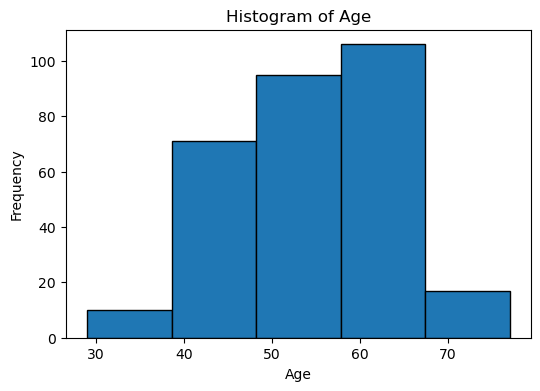

In [97]:
import matplotlib.pyplot as plt
df_plot = dataset.dropna()
plt.figure(figsize=(6,4)) 
plt.hist(df_plot['age'], bins=5, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

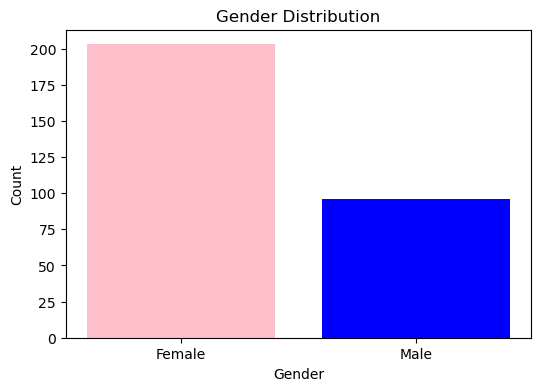

In [98]:
gender_counts = df['sex'].value_counts()
genders = ['Female', 'Male']
plt.figure(figsize=(6, 4))
plt.bar(genders, gender_counts, color=['pink', 'blue'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### QUESTION 2 ( TEST - TRAIN SPLIT )

In [99]:
from sklearn.model_selection import train_test_split



train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
valid_df, test_df = train_test_split(temp_df, test_size=0.333, random_state=42)
print("Train set shape:", train_df.shape)
print("Validation set shape:", valid_df.shape)
print("Test set shape:", test_df.shape)

feature_columns = ['age','trestbps','chol', 'thalch','oldpeak']
x = df[feature_columns].values
y = df['num'].values

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=0)
x_valid , x_test, y_valid , y_test = train_test_split(x_temp, y_temp, test_size=0.3333, random_state=0)

# x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=0)
# x_valid , x_test, y_valid , y_test = train_test_split(x_temp, y_temp, test_size=0.3333, random_state=0)
print("Train set shape:", x_train.shape ,"  " , y_train.shape )
print("Validation set shape:", x_valid.shape ,"  " , y_valid.shape)
print("Test set shape:", x_test.shape ,"  " , y_test.shape)


Train set shape: (212, 22)
Validation set shape: (61, 22)
Test set shape: (31, 22)
Train set shape: (212, 5)    (212,)
Validation set shape: (61, 5)    (61,)
Test set shape: (31, 5)    (31,)


#### QUESTION 3 (KNN IMPLEMENTATION)

#### KNN algorithm from scratch

In [101]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.xx_train = X
        self.yy_train = y
    
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    
    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [np.sqrt(np.sum((x - xx_train) ** 2)) for xx_train in self.xx_train]
        
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.yy_train[i] for i in k_indices]
        
        # Perform majority vote to find the most common class label among the k neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
for i in range(1, 16, 2):    
 knn = KNN(k=i)

# Fit the model
 knn.fit(x_train, y_train)

# Predict
 predictions = knn.predict(x_test)
 print ("For k = ",i)   
 print("Predictions:", predictions)
 accuracy = accuracy_score(y_test, predictions)*100
 print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')
   

For k =  1
Predictions: [2. 3. 0. 2. 0. 1. 2. 0. 2. 2. 0. 3. 0. 1. 0. 0. 0. 3. 2. 0. 0. 0. 0. 0.
 0. 3. 0. 2. 3. 3. 4.]
Accuracy of our model is equal 45.16 %.
For k =  3
Predictions: [2. 3. 0. 2. 0. 1. 2. 0. 2. 2. 0. 3. 0. 1. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.
 0. 0. 0. 2. 1. 0. 4.]
Accuracy of our model is equal 48.39 %.
For k =  5
Predictions: [0. 3. 0. 2. 0. 1. 2. 0. 2. 4. 0. 0. 0. 1. 0. 0. 0. 3. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 2.]
Accuracy of our model is equal 54.84 %.
For k =  7
Predictions: [0. 3. 0. 2. 0. 1. 2. 0. 2. 4. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 2.]
Accuracy of our model is equal 58.06 %.
For k =  9
Predictions: [0. 1. 0. 2. 0. 1. 3. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0.
 0. 0. 0. 0. 2. 0. 0.]
Accuracy of our model is equal 67.74 %.
For k =  11
Predictions: [0. 1. 0. 2. 0. 1. 3. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
Accuracy of our model is equal 67.74 %.
For k =  13
Predictions: [0. 1. 0. 2. 0

#### KNN using the Sklearn library

In [109]:
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
valid_df, test_df = train_test_split(temp_df, test_size=0.333, random_state=42)

# Extracting feature columns and target variable
feature_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
x_train = train_df[feature_columns].values
y_train = train_df['num'].values
x_valid = valid_df[feature_columns].values
y_valid = valid_df['num'].values
x_test = test_df[feature_columns].values
y_test = test_df['num'].values


# Handling NaN values for scikit-learn KNeighborsClassifier
x_train_nonan = x_train[~np.isnan(x_train).any(axis=1)]
y_train_nonan = y_train[~np.isnan(x_train).any(axis=1)]

x_test_nonan = x_test[~np.isnan(x_test).any(axis=1)]
y_test_nonan = y_test[~np.isnan(x_test).any(axis=1)]

for i in range (1, 16 ,2):
    # Scikit-learn KNN implementation
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train_nonan, y_train_nonan)
    y_pred = classifier.predict(x_test_nonan)

    accuracy = accuracy_score(y_test_nonan, y_pred) * 100
    print('Accuracy of scikit-learn KNeighborsClassifier is equal to ' + str(round(accuracy, 2)) + ' %.')




Accuracy of scikit-learn KNeighborsClassifier is equal to 38.71 %.
Accuracy of scikit-learn KNeighborsClassifier is equal to 45.16 %.
Accuracy of scikit-learn KNeighborsClassifier is equal to 48.39 %.
Accuracy of scikit-learn KNeighborsClassifier is equal to 51.61 %.
Accuracy of scikit-learn KNeighborsClassifier is equal to 51.61 %.
Accuracy of scikit-learn KNeighborsClassifier is equal to 51.61 %.
Accuracy of scikit-learn KNeighborsClassifier is equal to 51.61 %.
Accuracy of scikit-learn KNeighborsClassifier is equal to 51.61 %.


#### QUESTION 4 (K-FOLD CROSS VALIDATION)

In [63]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
dataset = pd.read_csv('heart_disease_uci.csv')
df = dataset.dropna()
feature_columns = ['age','trestbps','chol', 'thalch','oldpeak']
x = df[feature_columns].values
y = df['num'].values
clf = DecisionTreeClassifier(random_state=42)
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf, x, y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.51666667 0.48333333 0.41666667 0.43333333 0.40677966]
Average CV Score:  0.4513559322033899
Number of CV Scores used in Average:  5


####  Using stratified sampling

In [65]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
dataset = pd.read_csv('heart_disease_uci.csv')
df = dataset.dropna()
feature_columns = ['age','trestbps','chol', 'thalch','oldpeak']
x = df[feature_columns].values
y = df['num'].values
clf = DecisionTreeClassifier(random_state=42)

from sklearn.model_selection import StratifiedKFold
n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


for train_index, test_index in stratified_kfold.split(x, y):
    xst_train, xst_test = x[train_index], x[test_index]
    yst_train, yst_test = y[train_index], y[test_index]

k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf, xst_train, yst_train, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf, xst_test, yst_test, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.41666667 0.45833333 0.45833333 0.5        0.41666667]
Average CV Score:  0.45
Number of CV Scores used in Average:  5
Cross Validation Scores:  [0.41666667 0.5        0.33333333 0.66666667 0.54545455]
Average CV Score:  0.4924242424242424
Number of CV Scores used in Average:  5


#### Using bootstraps

In [62]:
n_bootstraps = 3
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Loop through the folds
for fold_index, (train_index, test_index) in enumerate(stratified_kfold.split(x, y)):
    xst_train, xst_test = x[train_index], x[test_index]
    yst_train, yst_test = y[train_index], y[test_index]
    
    # Initialize an empty array to hold bootstrapped samples
    bootstrapped_samples = []

    # Perform bootstrapping within the fold
    for _ in range(n_bootstraps):
        # Generate random indices with replacement
        bootstrap_indices = np.random.choice(len(xst_train), size=len(xst_train), replace=True)
        
        # Create bootstrapped sample using the random indices
        xb_bootstrap = xst_train[bootstrap_indices]
        yb_bootstrap = yst_train[bootstrap_indices]
        
        # Append the bootstrapped sample to the list
        bootstrapped_samples.append((xb_bootstrap, yb_bootstrap))
    
    # Now you have a list of bootstrapped samples for training
    # You can use these samples to train your model in each iteration of the fold
    for bootstrap_index, (xb_bootstrap, yb_bootstrap) in enumerate(bootstrapped_samples):
        # Train your model using X_bootstrap and y_bootstrap
        # You can also evaluate your model using X_test and y_test
        
        # Example: Decision Tree classifier
        from sklearn.tree import DecisionTreeClassifier
        model = DecisionTreeClassifier()
        model.fit(xb_bootstrap, yb_bootstrap)
        accuracy = model.score(xst_test, yst_test)
        print(f"Fold {fold_index + 1}, Bootstrap {bootstrap_index + 1} - Accuracy: {accuracy:.4f}")

Fold 1, Bootstrap 1 - Accuracy: 0.4000
Fold 1, Bootstrap 2 - Accuracy: 0.5167
Fold 1, Bootstrap 3 - Accuracy: 0.4667
Fold 2, Bootstrap 1 - Accuracy: 0.3667
Fold 2, Bootstrap 2 - Accuracy: 0.5000
Fold 2, Bootstrap 3 - Accuracy: 0.4667
Fold 3, Bootstrap 1 - Accuracy: 0.4167
Fold 3, Bootstrap 2 - Accuracy: 0.3833
Fold 3, Bootstrap 3 - Accuracy: 0.4333
Fold 4, Bootstrap 1 - Accuracy: 0.4333
Fold 4, Bootstrap 2 - Accuracy: 0.4500
Fold 4, Bootstrap 3 - Accuracy: 0.4333
Fold 5, Bootstrap 1 - Accuracy: 0.3898
Fold 5, Bootstrap 2 - Accuracy: 0.4576
Fold 5, Bootstrap 3 - Accuracy: 0.4237


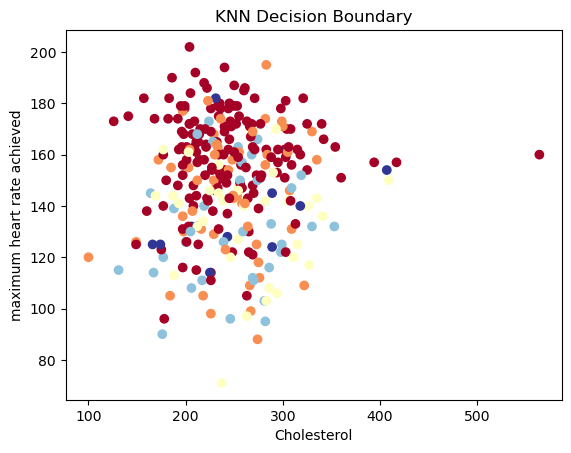

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('heart_disease_uci.csv')
df = dataset.dropna()
feature_columns = ['age','trestbps','chol', 'thalch','oldpeak']
x = df[feature_columns].values
y = df['num'].values
plt.scatter(x[:, 2], x[:, 3], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('Cholesterol')
plt.ylabel('maximum heart rate achieved')
plt.title('KNN Decision Boundary')
plt.show()